# Exploratory analysis of online transactions



Our client is an e-commerce site that sells wholesale electronics. You have been contracted to explore the dataset and identify whether a given transaction is fraudulent or not. You only have information about each user’s first transaction on the customer's website. If you fail to identify a fraudulent transaction, our client loses money equivalent to the price of the fraudulently purchased product. If you incorrectly flag a real transaction as fraudulent, it inconveniences the customers whose valid transactions are flagged.


In [1]:

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd




##### *Q1*  -- Load the Dataset into a dataframe called transactions


In [ ]:
Your code goes here 

Assuming Column 1 is the index from the original table, there are 10 features and a target value "class"; of these 10 features *user_id, device_id, source, browser, sex* are categorical values. Although a numerical value, IP adress is actually a categorical value that represents the user's location. *Age and purchase_value* are continuous variables. 

Interestingly, the dataset also contains information about the user's *signup_time* and *purchase_time*, having done some analysis in the past, the time in between purchase time and signup time has impact on the classification of transaction if its fraudulent or not.

Let's create a new variable *timeBetween* to represent this time period in term sof seconds.

In [33]:
import datetime

###### Q2 ---- Create a new column *timeBetween* as described above

In [ ]:
Your code goes here 

Let's start getting familiar with our dataset to get an idea about the features (input variables) and the target variable.

## Input Variables

### Continuous Variables

In [5]:
# Counts:
numberOfUsers = len(transactions.user_id.unique())
print('number of users: ', numberOfUsers)

numberOfDevices = len(transactions.device_id.unique())
print('number of devices: ', numberOfDevices)

number of users:  120000
number of devices:  110599


In [6]:
multipleUsers = transactions['device_id'].value_counts()

In [7]:
multipleUsers.values

array([19, 17, 17, ...,  1,  1,  1], dtype=int64)

It looks like some devices were used more than once, this could have an impact on the type of transaction. Let's create a new feature (new column) to use notate how many times the same device was used. 

##### Q3 - Create a new column labeled *numberOfTimesDeviceUsed* to identify how many times teh same device is used to make purchases


In [ ]:
Your code goes here 

##### Q4 -- Create a box plot of *numberOfTimesDeviceUsed* by the target variable *class*

In [ ]:
Your code goes here 

##### Q5 -- Create a box plot of *user_id* by the target variable *class*

In [ ]:
Your code goes here 


There are as many *user_id*s as the number of rows. So, the _user_id*s are unique to each user, it probably won't have any impact on the target variable. But let's just verify this visually by using a box plot.


##### Q6 -- Create a box plot of *purchase_value* by the target variable *class*

In [ ]:
Your code goes here 

##### Q7 -- Create a box plot of *age* by the target variable *class*

In [ ]:
Your code goes here 

##### Q8 -- Create a box plot of *timeBetween* by the target variable *class*

In [ ]:
Your code goes here 

##### Q9 -- Create a summary of the continuous variables: *timeBetween, numerOfTimesDeviceUsed, age and purchase_value* by the target variable *class* to show the average value by each *class* value (Your table should have at least the columns mentioned, there will not be a point deduction for extra columns). Interpret the table: do any of these variables seem important?

In [ ]:
Your code goes here 

### Categorical Variables

When looking at categorical variables, we want to make sure that they are equally distributed in the data table to assess their impact on the target variable. If one categorical variable shows up considerable more (or less) than the others, we might have bias in the dataset that we'll have to deal with before going into building models.


##### Q10 -- Create a bar plot that shows the different categories of *source* variable

In [ ]:
Your code goes here 

##### Q11 -- Create a bar plot that shows the different categories of *browser* variable

In [ ]:
Your code goes here 

##### Q12 -- Create a bar plot that shows the different categories of *sex* variable

In [ ]:
Your code goes here 

In [ ]:
import seaborn as sns

##### Q13 -- Create a bar plot that shows the different categories of *sex* variable colored by the value of *class* variable

In [ ]:
Your code goes here 

##### Q14 -- Create a bar plot that shows the different categories of *browser* variable colored by the value of *class* variable

In [ ]:
Your code goes here 

## Target variable

0    108735
1     11265
Name: class, dtype: int64

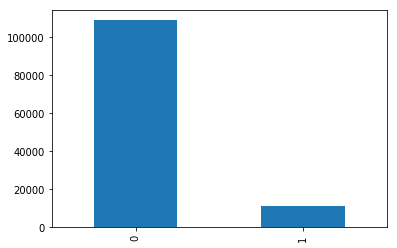

In [21]:
transactions['class'].value_counts().plot.bar()
transactions['class'].value_counts()

###### There is a big imbalance between fraudulent (*class=1*) and normal(*class=0*) transactions, we need to keep this in mind when building models.

### Insight from data exploration:

   - Time between signup and purchase and how many times the same device was used are important, we'll explore the relationship between target variable and the new features that we created *timeBetween* and *numberOfTimesDeviceUsed* in detail
   - Looks like the categorical values are sampled similarly for both values of target variable, no concern for sampling bias 

#### Time between the signup and purchase

In [22]:

# total number of fraudulent transactions
totalFraudulent = len(transactions[transactions['class'] == 1])
print('total number of fraudulent transactions : ', totalFraudulent)

## find the cases where timeBetween is zero (just signed up to make a purchase)
zeroSecondsTransactions = transactions[(transactions['timeBetween'] == 0)]
fraudulentAtZeroSeconds = len(zeroSecondsTransactions[zeroSecondsTransactions['class']==1])
nonFraudulentAtZeroSeconds = len(zeroSecondsTransactions[zeroSecondsTransactions['class']==0])

print('total number of fraudulent transactions at zero seconds : ', fraudulentAtZeroSeconds)
print('total number of NONfraudulent transactions at zero seconds : ', nonFraudulentAtZeroSeconds)
print('if the customer makes a purchase at ZERO seconds after signup, these transactions are FRAUDULENT ', round(100*fraudulentAtZeroSeconds/len(zeroSecondsTransactions),2) ,'% of the time' )
ratio = round(100*(fraudulentAtZeroSeconds/totalFraudulent),2)
print('In the given dataset ', ratio,'% of fraudulent transactions happen at ZERO seconds from signup')


total number of fraudulent transactions :  11265
total number of fraudulent transactions at zero seconds :  5936
total number of NONfraudulent transactions at zero seconds :  0
if the customer makes a purchase at ZERO seconds after signup, these transactions are FRAUDULENT  100.0 % of the time
In the given dataset  52.69 % of fraudulent transactions happen at ZERO seconds from signup


#### Number of times the same device was used

In [23]:
deviceUsedMoreThanOnce = transactions[(transactions['numberOfTimesDeviceUsed'] > 1)]
print(len(deviceUsedMoreThanOnce), ' of the records show that the same device was used more than once')

13614  of the records show that the same device was used more than once


13614  of the transactions show that the same device was used more than once

In [24]:
fraudulentMultipleUse = deviceUsedMoreThanOnce[deviceUsedMoreThanOnce['class'] == 1]
print( ' Of these ', len(deviceUsedMoreThanOnce), ' transactions, ', len(fraudulentMultipleUse), 'of them are fraudulent ---', round(100*len(fraudulentMultipleUse)/len(deviceUsedMoreThanOnce),2), '% of the time')

 Of these  13614  transactions,  7685 of them are fraudulent --- 56.45 % of the time


##### Q15 -- What is the percentage of the fraudulent transactions occur when a device was used multiple times? 

In [ ]:
Your code goes here 

There are 2 important predictors: time between signup and purchase and if the same device was used. So a critical user action to watch out for would be if a new userid is created on a previously used device to make a purchase right after sign up. 
    

Let's check the sampling of the target *class*. We want to make sure that there is equal (--ish) representation of both classes to build a reliable model.


##### Q16 -- What percentage of all the transactions in our dataset were fraudulent transactions?

In [ ]:
Your code goes here 

One last step before going into modeling is to check to see if there are any missing values.

##### Q17 - Build a heatmap that highlights if there are any missing values in this dataset and verify your results by using pandas info() function

In [ ]:
Your code goes here 

#### Q18 (3 pts) --- Summarize your findings and indentify next steps on building a model to identify fraudulent transactions when they occure. DO NOT BUILD ANY MODELS. This questions is about presenting your findings in a way that it will make sense to the management to extend the contract to follow up and build models.


In [ ]:
Your code goes here 